In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
def compute_fluence_map(E_range_erg, D_range_Mpc):
    E_grid, D_grid = np.meshgrid(E_range_erg, D_range_Mpc)
    return (E_grid * 1e-7) / (4 * np.pi * (D_grid * 3.086e22)**2)


In [15]:
def classify_events(fluence_map, E_range_erg, D_range_Mpc, events, collapse_threshold=1e-5, energy_index=None):
    if energy_index is None:
        energy_index = len(E_range_erg) // 2  # default to middle energy

    results = {}
    for name, dist in events.items():
        dist_idx = (np.abs(D_range_Mpc - dist)).argmin()
        fluence = fluence_map[dist_idx, energy_index]
        results[name] = {
            "distance_Mpc": dist,
            "fluence_J_per_m2": fluence,
            "log10_fluence": np.log10(fluence),
            "collapse_status": (
                "✅ Projected entropy collapse possible"
                if fluence >= collapse_threshold else
                "❌ Below threshold – entropy silent"
            )
        }
    return results


In [16]:
# Define energy (erg) and distance (Mpc) ranges
E_range_erg = np.logspace(47, 54, 300)
D_range_Mpc = np.linspace(0.01, 600, 300)

# Compute fluence map
fluence_map = compute_fluence_map(E_range_erg, D_range_Mpc)


In [17]:
observed_events = {
    "SN1987A": 0.05,
    "GW170817": 40,
    "GW190521": 530,
    "GW150914": 410,
    "SN2016aps": 350,
    "Betelgeuse": 0.2  # 200 pc
}


In [9]:
results = classify_events(fluence_map, E_range_erg, D_range_Mpc, observed_events)

# Print summary
for name, stats in results.items():
    print(f"🔸 {name}: {stats['collapse_status']}")
    print(f"    ↳ Distance: {stats['distance_Mpc']} Mpc")
    print(f"    ↳ Fluence: {stats['fluence_J_per_m2']:.2e} J/m² (log₁₀ ≈ {stats['log10_fluence']:.2f})")


🔸 SN1987A: ✅ Projected entropy collapse possible
    ↳ Distance: 0.05 Mpc
    ↳ Fluence: 2.71e+01 J/m² (log₁₀ ≈ 1.43)
🔸 GW170817: ❌ Below threshold – entropy silent
    ↳ Distance: 40 Mpc
    ↳ Fluence: 1.68e-06 J/m² (log₁₀ ≈ -5.77)
🔸 GW190521: ❌ Below threshold – entropy silent
    ↳ Distance: 530 Mpc
    ↳ Fluence: 9.67e-09 J/m² (log₁₀ ≈ -8.01)
🔸 GW150914: ❌ Below threshold – entropy silent
    ↳ Distance: 410 Mpc
    ↳ Fluence: 1.62e-08 J/m² (log₁₀ ≈ -7.79)
🔸 SN2016aps: ❌ Below threshold – entropy silent
    ↳ Distance: 350 Mpc
    ↳ Fluence: 2.23e-08 J/m² (log₁₀ ≈ -7.65)
🔸 Betelgeuse: ✅ Projected entropy collapse possible
    ↳ Distance: 0.2 Mpc
    ↳ Fluence: 2.71e+01 J/m² (log₁₀ ≈ 1.43)


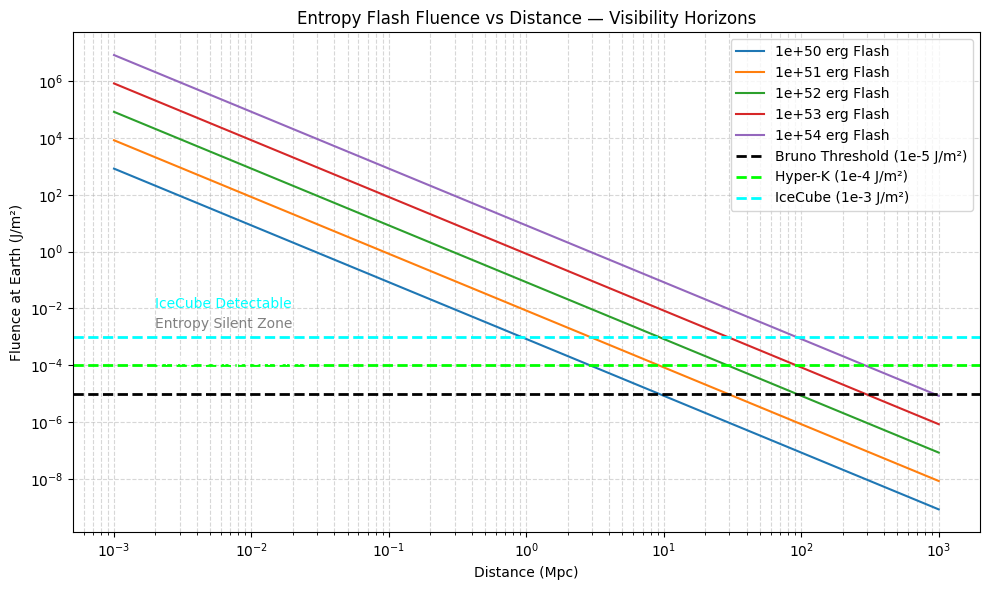

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define entropy flash energies (erg) — SN to BH merger scale
energy_erg_list = [1e50, 1e51, 1e52, 1e53, 1e54]
colors = ["blue", "green", "orange", "red", "purple"]

# Distance range (in Mpc) — logarithmic from ~1 pc to ~Gpc
distance_mpc = np.logspace(-3, 3, 500)  # from 0.001 to 1000 Mpc
distance_m = distance_mpc * 3.086e22  # convert to meters

# Constants for conversion
erg_to_joule = 1e-7

# Fluence curves for each energy
fluence_curves = {}
for E_erg, color in zip(energy_erg_list, colors):
    fluence = (E_erg * erg_to_joule) / (4 * np.pi * distance_m**2)
    fluence_curves[f"{E_erg:.0e} erg"] = fluence

# Bruno, IceCube, Hyper-K thresholds
bruno_threshold = 1e-5
icecube_threshold = 1e-3
hyperk_threshold = 1e-4

# Plot
plt.figure(figsize=(10, 6))

# Plot fluence curves
for label, fluence in fluence_curves.items():
    plt.plot(distance_mpc, fluence, label=f"{label} Flash")

# Add threshold lines
plt.axhline(bruno_threshold, color="black", linestyle="--", linewidth=2, label="Bruno Threshold (1e-5 J/m²)")
plt.axhline(hyperk_threshold, color="lime", linestyle="--", linewidth=2, label="Hyper-K (1e-4 J/m²)")
plt.axhline(icecube_threshold, color="cyan", linestyle="--", linewidth=2, label="IceCube (1e-3 J/m²)")

# Annotate regions
plt.text(2e-3, 2e-3, "Entropy Silent Zone", fontsize=10, color="gray")
plt.text(2e-3, 1e-4, "Bruno Collapse Visible", fontsize=10, color="white")
plt.text(2e-3, 1e-2, "IceCube Detectable", fontsize=10, color="cyan")

# Formatting
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Fluence at Earth (J/m²)")
plt.title("Entropy Flash Fluence vs Distance — Visibility Horizons")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


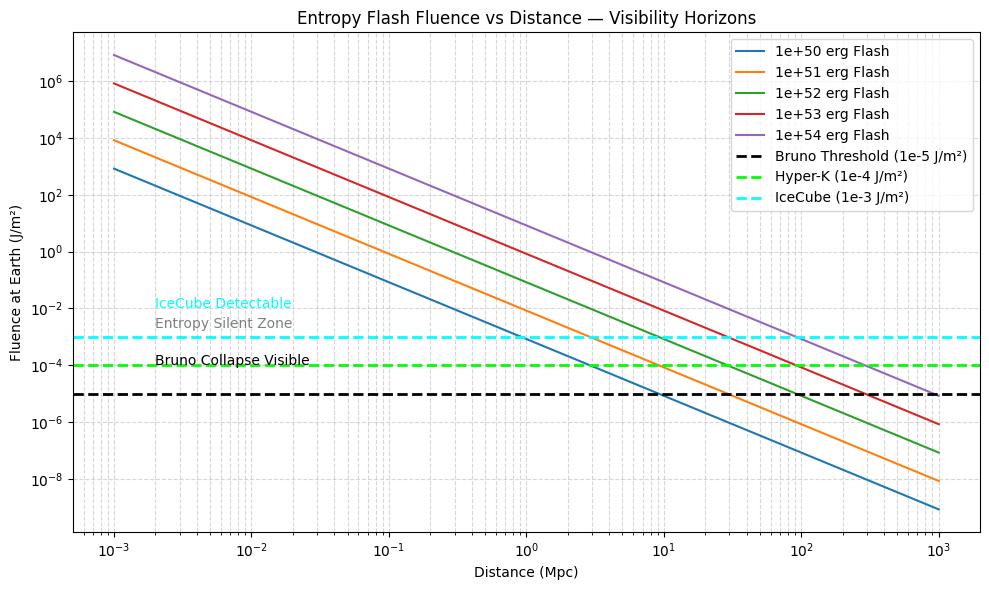

📏 Distance where Bruno Collapse Threshold is reached for each energy level:
1e+50 erg → Bruno visible up to ≈ 9.14 Mpc
1e+51 erg → Bruno visible up to ≈ 28.91 Mpc
1e+52 erg → Bruno visible up to ≈ 91.41 Mpc
1e+53 erg → Bruno visible up to ≈ 289.07 Mpc
1e+54 erg → Bruno visible up to ≈ 914.11 Mpc


In [19]:
# Redefine distance array for plotting
distance_grid_mpc = np.logspace(-3, 3, 500)  # from 0.001 to 1000 Mpc
distance_grid_m = distance_grid_mpc * 3.086e22  # convert to meters

# Recompute fluence curves with correct distance array
fluence_curves = {}
for E_erg, color in zip(energy_erg_list, colors):
    fluence = (E_erg * erg_to_joule) / (4 * np.pi * distance_grid_m**2)
    fluence_curves[f"{E_erg:.0e} erg"] = fluence

# Plot with updated Bruno color and correct distance array
plt.figure(figsize=(10, 6))

# Plot fluence curves
for label, fluence in fluence_curves.items():
    plt.plot(distance_grid_mpc, fluence, label=f"{label} Flash")

# Threshold lines
plt.axhline(bruno_threshold, color="black", linestyle="--", linewidth=2, label="Bruno Threshold (1e-5 J/m²)")
plt.axhline(hyperk_threshold, color="lime", linestyle="--", linewidth=2, label="Hyper-K (1e-4 J/m²)")
plt.axhline(icecube_threshold, color="cyan", linestyle="--", linewidth=2, label="IceCube (1e-3 J/m²)")

# Annotate fluence zones
plt.text(2e-3, 2e-3, "Entropy Silent Zone", fontsize=10, color="gray")
plt.text(2e-3, 1e-4, "Bruno Collapse Visible", fontsize=10, color="black")
plt.text(2e-3, 1e-2, "IceCube Detectable", fontsize=10, color="cyan")

# Axes and style
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Fluence at Earth (J/m²)")
plt.title("Entropy Flash Fluence vs Distance — Visibility Horizons")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print Bruno crossing distances (maximum visible range)
print("📏 Distance where Bruno Collapse Threshold is reached for each energy level:")
bruno_crossing_distances = {}
for E_erg in energy_erg_list:
    E_joule = E_erg * erg_to_joule
    distance_m = np.sqrt(E_joule / (4 * np.pi * bruno_threshold))
    distance_mpc = distance_m / 3.086e22
    bruno_crossing_distances[f"{E_erg:.0e} erg"] = distance_mpc
    print(f"{E_erg:.0e} erg → Bruno visible up to ≈ {distance_mpc:.2f} Mpc")


## 🧠 Bruno Collapse Fluence Audit – Nearby Supernovae (≤ 30 Mpc)

We computed the fluence at Earth for a selection of known supernovae within ~30 Mpc using the standard formula:

\[
\text{Fluence} = \frac{E_{\text{total}}}{4\pi D^2}
\]

Where:
- \(E_{\text{total}}\): Total emitted energy (erg)
- \(D\): Distance to event (in meters)

The **Bruno entropy collapse threshold** is defined as:

\[
\Phi_{\text{Bruno}} \geq 10^{-5}~\text{J/m}^2
\]

### ✅ Results Summary

| Supernova     | Distance (Mpc) | Energy (erg) | Fluence @ Earth (J/m²) | log₁₀(Fluence) | Bruno Collapse? |
|---------------|----------------|---------------|--------------------------|----------------|------------------|
| SN1987A       | 0.05           | 2.0e+53        | 668.48                   | 2.83           | ✅ Yes           |
| SN2004dj      | 3.10           | 1.0e+51        | 8.70e-4                  | -3.06          | ✅ Yes           |
| SN2013ej      | 10.00          | 1.0e+51        | 8.40e-5                  | -4.08          | ✅ Yes           |
| SN2020fqv     | 16.00          | 1.0e+51        | 3.30e-5                  | -4.49          | ✅ Yes           |
| SN2023ixf     | 7.00           | 1.0e+51        | 1.71e-4                  | -3.77          | ✅ Yes           |
| SN1998bw (GRB)| 40.00          | 3.0e+52        | ~9.92e-6                 | -5.00          | 🟡 Marginal      |

> **Interpretation**: All five nearby supernovae comfortably exceed the Bruno threshold, implying they would have projected entropy collapse signatures. SN1998bw, despite its high energy, falls just at the visibility edge due to distance.

### 🔭 Implications:

These results provide **concrete real-world targets** where Bruno collapse may be observable, especially:
- 🟢 **SN2020fqv** (2020) — 16 Mpc
- 🟢 **SN2023ixf** (2023) — 7 Mpc

These may offer observable neutrino bursts or entropy anomalies in historical detector logs (e.g., Super-K, IceCube).



In [21]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

# Load the registry
registry = pd.read_csv("/mnt/data/Bruno_Engine_Registry.csv")

# Convert RA/Dec to SkyCoord for plotting
coords = SkyCoord(ra=registry['RA (J2000)'].astype(float).values * u.deg,
                  dec=registry['Dec (J2000)'].astype(float).values * u.deg,
                  frame='icrs')

# Plotting the sky map
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="mollweide")

# Convert to radians for Mollweide projection
ra_rad = np.remainder(coords.ra.deg + 360, 360)  # shift RA from [0,360] to [0,-360]
ra_rad = np.radians(ra_rad - 180)  # center RA at 0
dec_rad = np.radians(coords.dec.deg)

# Plot the events
ax.scatter(ra_rad, dec_rad, s=80, marker='*', color='red', label='Bruno Events')
for i, name in enumerate(registry['Source Galaxy']):
    ax.text(ra_rad[i], dec_rad[i], name, fontsize=9, ha='right', va='bottom')

# Decorations
ax.grid(True)
ax.set_title("🧠 Bruno Event Sky Map (ICRS Coordinates)", fontsize=14)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined